# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))

Wholesale customers dataset has 440 samples with 6 features each.


### Multiple outputs per line

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [12]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [13]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100,200,300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


## Pair plot of Features

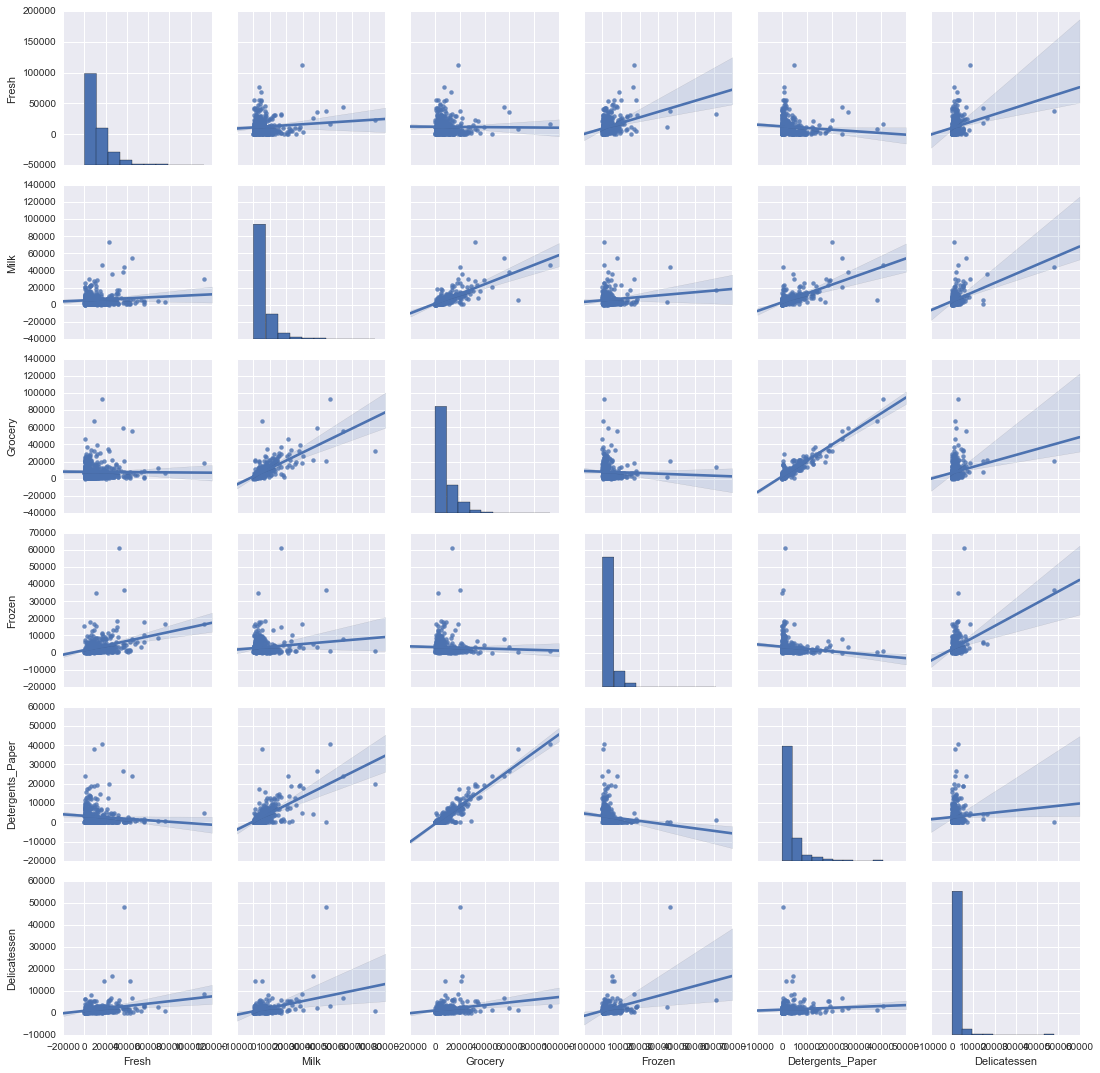

In [14]:
sns.pairplot(data, kind="reg")

### Look at the variance of each column

In [15]:
cov = np.cov(data)
data.var(axis=0)

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

#### looks like items are arranged in decreasing order of variance (except second and third column)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

 **Answer:** 

In [16]:
samples
display(samples.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,10369.666667,9087.333333,13877.000000,2672.333333,6885.333333,1921.666667
std,6773.996925,3677.404565,8516.779849,1637.355286,3781.911201,1151.264233
min,3067.000000,6243.000000,6360.000000,824.000000,2662.000000,731.000000
25%,7330.500000,7011.000000,9252.000000,2038.000000,5348.500000,1368.000000
50%,11594.000000,7779.000000,12144.000000,3252.000000,8035.000000,2005.000000
75%,14021.000000,10509.500000,17635.500000,3596.500000,8997.000000,2517.000000
max,16448.000000,13240.000000,23127.000000,3941.000000,9959.000000,3029.000000


**Answer:**


### Calculate Z_score for the sample points

In [17]:
data_z=pd.DataFrame()
cols=data.columns
for col in cols:
    col_zscore = col + '_zscore'
    data_z[col_zscore] = (data[col] - data[col].mean())/data[col].std(ddof=0)

In [18]:
# Keep only the z scores of th3 three chosen indices
data_z=data_z.ix[indices,'Fresh_zscore': 'Delicatessen_zscore']
data_z

,Fresh_zscore,Milk_zscore,Grocery_zscore,Frozen_zscore,Detergents_Paper_zscore,Delicatessen_zscore
100,-0.032162,0.268955,0.441695,0.037134,1.082116,0.533966
200,-0.707143,1.009733,1.598731,0.179221,1.486111,-0.281824
300,0.352072,0.060599,-0.167638,-0.463572,-0.046088,0.170446


### Interpretation:
* Distance from zero is indication of distance from the mean.

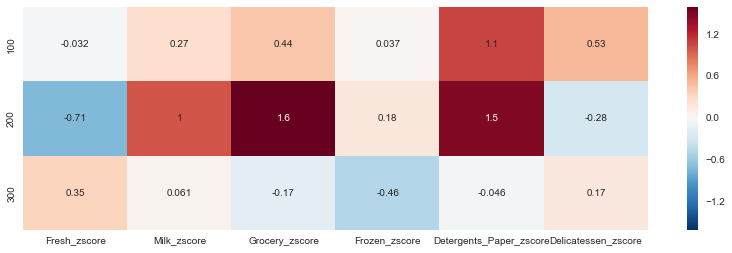

In [19]:
plt.figure(figsize=(14, 4))
sns.heatmap(data_z,annot=True)
data_z1=data_z

###  Also look at perecentiles for the sample points

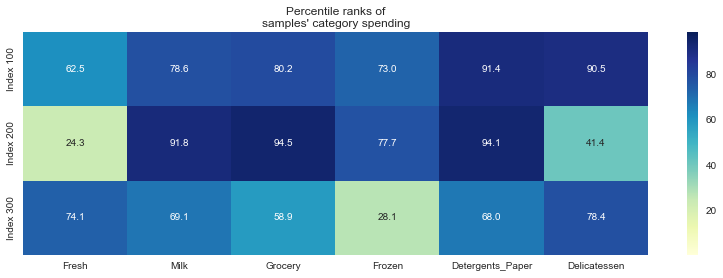

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
#print(pcts)

# visualize percentiles with heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')

### The establishment for each row  is chosen based on the statistics provided by the describe function
* Row 100=Supermarket. There is a good mix of everything in this row. The feature vale is close to the mean feature value.
* Row 200=Grocery store. Very high grocery and detergent paper values
* Row 300=Hotel. Fresh is the highest.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [21]:
from sklearn.cross_validation import train_test_split
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Grocery'],test_size=0.25,random_state=7)
                                    
# TODO: Create a decision tree regressor and fit it to the training set

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train )

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
score

0.69535747457205255

# Tried dropping all the variables(to see if any feature can be dropped)  once and  made predictions

In [22]:
%%capture
score=[]
for i in range(0,10):
 score.append([])
 for n in range(0,6):
  new_data = data.drop(data.columns[n], axis=1,)
  X_train, X_test, y_train, y_test = train_test_split(new_data,data.iloc[:,n],test_size=0.25,random_state=7)
  regressor = DecisionTreeRegressor(random_state=0);
  regressor.fit(X_train,y_train );
  score[i].append(regressor.score(X_test,y_test));
  n 
#print("Dropped feature '{}':".format(data.columns[n]))
#print("R^2 is '{}':".format(score))

In [23]:
score=np.array(score)
score.mean(axis=0)

array([-0.68441588, -2.18645418,  0.69535747, -4.15226184,  0.72130521,
       -0.97160942])

### Interpretation:
** After 100 Iterations:**
* Fresh:                         0.73
* Milk: 0.24
* Grocery: 0.67
* Frozen: -1.29
* Detergents_Paper: 0.66
* Delicatessen: -3.2

Detergents_Paper and Grocery are highly predictable. We later discover they are in the segment. Milk is the next 'most' predicatble feature and it also falls in the same category. Fresh and Frozen  cannote be predicted fall in the ssame segment. Delicatessen that falls in neither category is the least predictable of all the features.

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 
* Dropped feature was grocery
* R^2= 0.69.
* R^2 is high (compared to other features) but not high enough to be dropped.
* If any feature has to be dropped it would be detergent or grocery.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

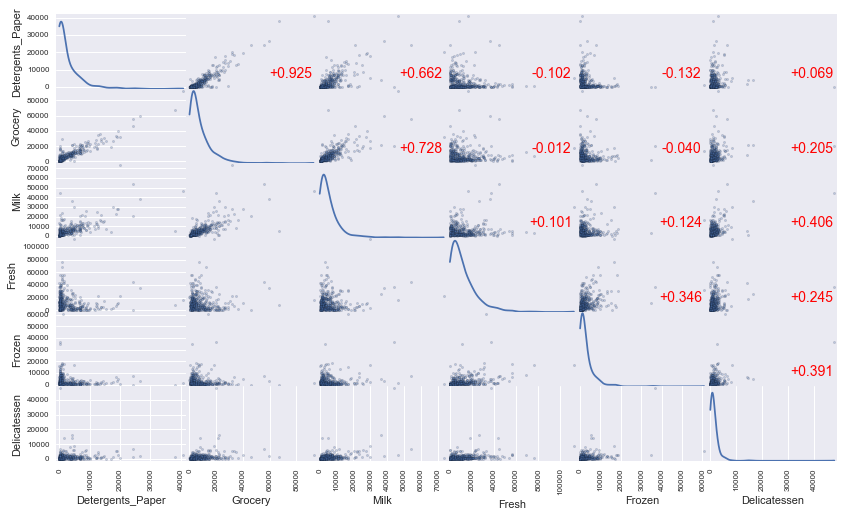

In [29]:
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
idx_reorder = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
axes = pd.scatter_matrix(data[idx_reorder], alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data[idx_reorder].corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%+.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center',color="red", fontsize=14)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

### Correlation Matrix

In [153]:
corr = data.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


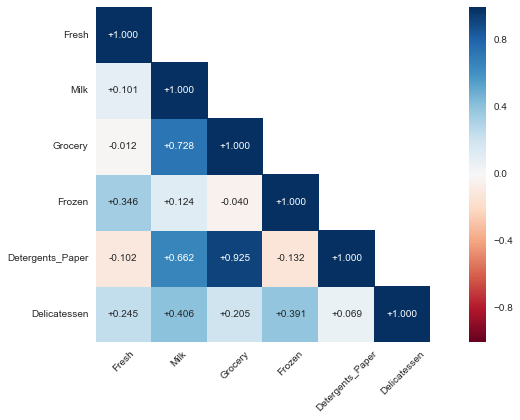

In [31]:
plt.figure(figsize=(14, 6))
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center');

### Correlations:
* Detergents_Paper and Grocery= 0.924641	

* Milk and Grocery= 0.728335    

*  Milk and Detergents_Paper= 0.661816 

### Detergent and Grocery  has high correlation. Earlier it was predicted that  these  two are  the least important variables in terms of segmentaion.

### The feature distributions appear to be skewed right (positive) — with a mean greater than the median.

In [155]:
pd.DataFrame(data.mean()-data.median())

,0
Fresh,3496.297727
Milk,2169.265909
Grocery,3195.777273
Frozen,1545.931818
Detergents_Paper,2064.993182
Delicatessen,559.370455


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

### Box COX transormation is done for the following reasons:
* To convert non-linear data to linear scale
* To solve the problem of heteroscedasticity

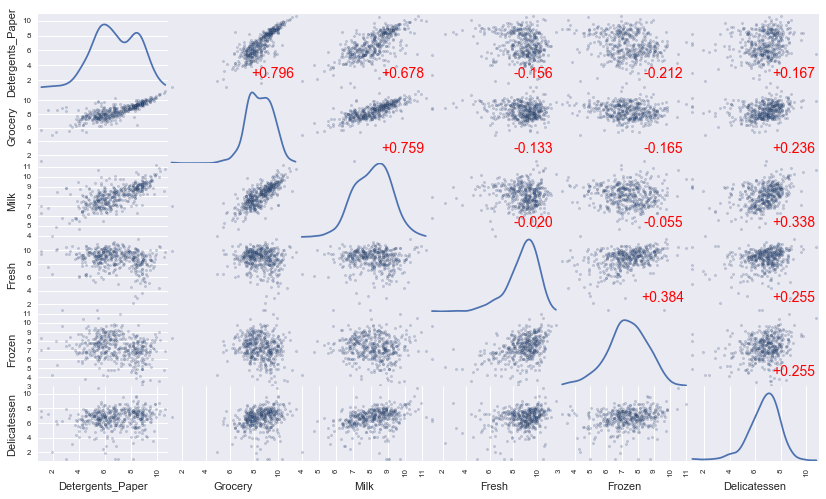

In [28]:
# TODO: Scale the data using the natural logarithm
log_data =np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples =np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
import matplotlib.pyplot as plt

idx_reorder = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
axes = pd.scatter_matrix(log_data[idx_reorder], alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = log_data[idx_reorder].corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%+.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center',color="red", fontsize=14)

### Data scatter appears more normal and the correlation is obserevd to be reduced

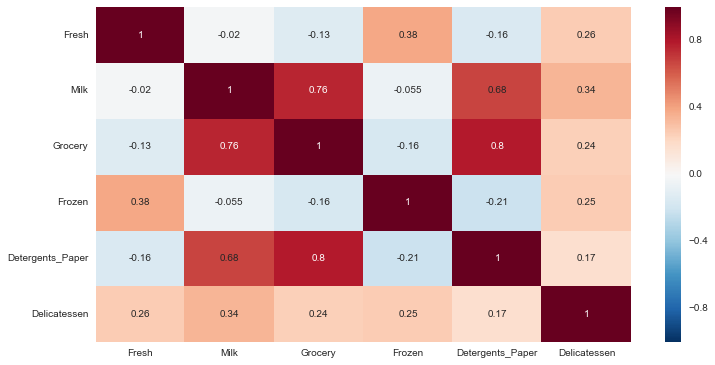

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(log_data.corr(),annot=True)

### Correlation reduced compared to original data

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [158]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


## Checking if the Normality has improved.

### BEFORE Transformation

### Testing Normailty by finding Chi-Square statistic p-value

In [159]:
import scipy.stats as stats
print ("Chi-Square results for Fresh: '{}':".format(stats.normaltest(data["Fresh"])))
print ("Chi-Square results for Frozen: '{}':".format(stats.normaltest(data["Frozen"])))
print ("Chi-Square results for Detergent Paper '{}':".format(stats.normaltest(data["Detergents_Paper"])))
print ("Chi-Square results for Fresh '{}':".format(stats.normaltest(data["Delicatessen"])))
print ("Chi-Square results for Fresh '{}':".format(stats.normaltest(data["Milk"])))
print ("Chi-Square results for Fresh '{}':".format(stats.normaltest(data["Grocery"])))

Chi-Square results for Fresh: 'NormaltestResult(statistic=274.34162662040899, pvalue=2.6759173855882678e-60)':
Chi-Square results for Frozen: 'NormaltestResult(statistic=546.90399640685735, pvalue=1.7430350282461951e-119)':
Chi-Square results for Detergent Paper 'NormaltestResult(statistic=371.81993263618244, pvalue=1.8210735948002004e-81)':
Chi-Square results for Fresh 'NormaltestResult(statistic=793.29833041667666, pvalue=5.4633157170835384e-173)':
Chi-Square results for Fresh 'NormaltestResult(statistic=410.65364260210919, pvalue=6.7250345862368488e-90)':
Chi-Square results for Fresh 'NormaltestResult(statistic=374.02330569249045, pvalue=6.0516125835768024e-82)':


### p-value of the statistic is extremely low. None of the columns are remotely normal. Distribution is skewed towards right.

### Histograms of features-BEFORE Transformation

(0, 40000)

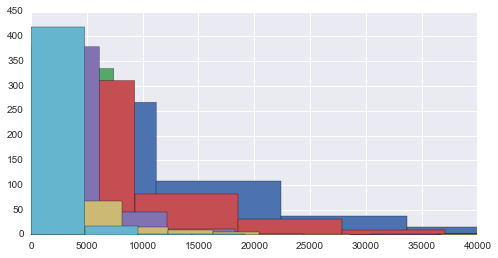

In [160]:
# before taking log
plt.figure(figsize=(8,4))
plt.xlim(0, 40000)
data['Fresh'].hist()
data["Milk"].hist()
data["Grocery"].hist()
data["Frozen"].hist()
data["Detergents_Paper"].hist()
data["Delicatessen"].hist()

### Since data is Right-Skewed(log-normal) we can convert to a normal distribution by taking log of the data

## AFTER Transformation

### Testing Normailty by finding Chi-Square statistic p-value

In [161]:
# After taking log
Data=log_data
stats.normaltest(Data["Fresh"])
stats.normaltest(Data["Frozen"])
stats.normaltest(Data["Detergents_Paper"])
stats.normaltest(Data["Delicatessen"])
stats.normaltest(Data["Milk"])
stats.normaltest(Data["Grocery"])

NormaltestResult(statistic=156.98719003393398, pvalue=8.1407575258209941e-35)

NormaltestResult(statistic=10.737598623997282, pvalue=0.0046597228260654815)

NormaltestResult(statistic=6.0189517250818474, pvalue=0.049317521147611225)

NormaltestResult(statistic=106.25398963719005, pvalue=8.4574474925298812e-24)

NormaltestResult(statistic=4.7456813845403074, pvalue=0.093215553117504332)

NormaltestResult(statistic=76.746171968133226, pvalue=2.1616257418011223e-17)

(2, 12)

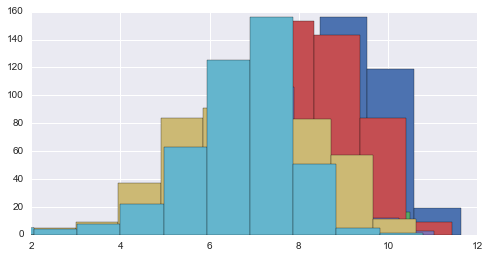

In [162]:
plt.figure(figsize=(8,4))
plt.xlim(2, 12)
log_data['Fresh'].hist()
log_data["Milk"].hist()
log_data["Grocery"].hist()
log_data["Frozen"].hist()
log_data["Detergents_Paper"].hist()
log_data["Delicatessen"].hist()

### Better Normailty(higher p-values) than before. Distribution from the plot looks almost normal.

###  Plot also looks more normal

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [39]:
# For each feature find the data points with extreme high or low values
index=[]
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25,axis=0) 
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75,axis=0)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) *1.5
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    index.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    
# OPTIONAL: Select the indices for data points you wish to remove
import collections


## Append Outliers for each feature to a single list
all=index[0].tolist()+index[1].tolist() +index[2].tolist()+index[3].tolist()+index[4].tolist()+index[5].tolist()

#  Identify common rows for outliers
outliers= ([item for item, count in collections.Counter(all).items() if count > 1])

# too many ouliers found so outliers set to[]
outliers=[]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** 

*** The  row numbers having more than one outlier are:***

In [40]:
print([item for item, count in collections.Counter(all).items() if count > 1],)

[128, 65, 66, 75, 154]


### The Outliers were not be removed because
*  There are only 440 points. Removal of outliers leads to reduction of availabe data. 
*  Data is not perfectly normal so outliers are expected 
*  When the outliers were removed the explained variance of PCA-1 and PCA-2 reduced marginally. 
*  Removal of outlier  may lead to a non-robust model(A model that may not perform well to new data). 


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA components:
[[-0.17371704  0.394463    0.45436364 -0.17219603  0.74551495  0.1494356 ]
 [ 0.68513571  0.16239926  0.06937908  0.487691    0.04191162  0.50970874]
 [ 0.67351166 -0.03306794  0.03218274 -0.28481122  0.21824404 -0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [ 0.00082162 -0.72228834 -0.34799325  0.03624337  0.56366476  0.19536639]
 [ 0.02927638 -0.54303508  0.81390826  0.0174477  -0.20244363  0.02283197]]
 PCA explained variance ratio:
[ 0.44237417  0.27657107  0.11617342  0.09617719  0.0457568   0.02294735]


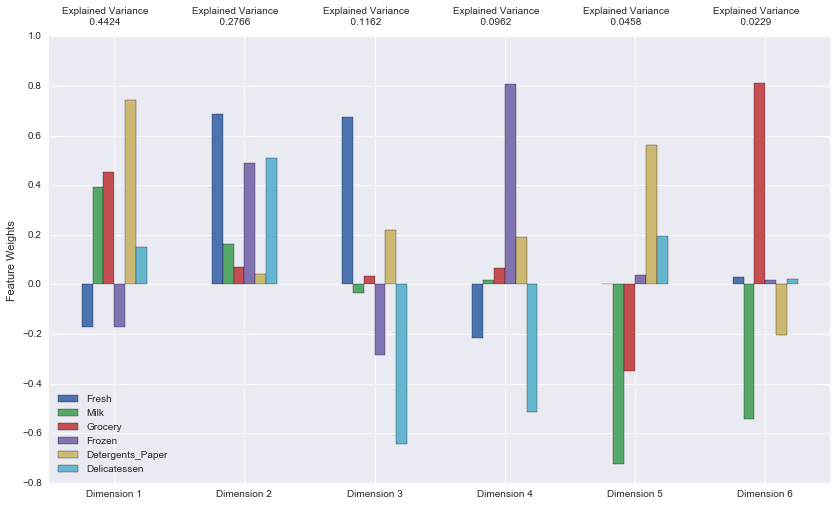

In [41]:
# TO DO: Apply PCA by fitting the good data with the same number of dimensions as features
import renders as rs
from sklearn.decomposition import PCA
pca = PCA()
pca_results=pca.fit(good_data)

# Print the components and the amount of variance in the data contained in each dimension
print( 'PCA components:\n{}'.format(pca.components_))
print(' PCA explained variance ratio:\n{}'.format(pca.explained_variance_ratio_))

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Results

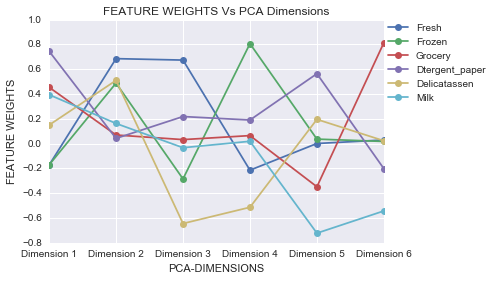

In [42]:
pca_results["Fresh"].plot( label="Fresh" ,marker='o')
pca_results["Frozen"].plot(label="Frozen",marker='o')
pca_results["Grocery"].plot(label="Grocery",marker='o')
pca_results["Detergents_Paper"].plot(label="Dtergent_paper",marker='o')
pca_results["Delicatessen"].plot(label="Delicatassen",marker='o')
pca_results["Milk"].plot(label="Milk",marker='o')
plt.legend(bbox_to_anchor=(1.00, 1), loc=2, borderaxespad=0.)
plt.xlabel("PCA-DIMENSIONS")
plt.ylabel("FEATURE WEIGHTS")
plt.title("FEATURE WEIGHTS Vs PCA Dimensions")

In [43]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4424,-0.1737,0.3945,0.4544,-0.1722,0.7455,0.1494
Dimension 2,0.2766,0.6851,0.1624,0.0694,0.4877,0.0419,0.5097
Dimension 3,0.1162,0.6735,-0.0331,0.0322,-0.2848,0.2182,-0.6446
Dimension 4,0.0962,-0.2143,0.0186,0.0645,0.8061,0.1901,-0.5135
Dimension 5,0.0458,0.0008,-0.7223,-0.3480,0.0362,0.5637,0.1954
Dimension 6,0.0229,0.0293,-0.5430,0.8139,0.0174,-0.2024,0.0228


### Plot of Variance Vs PCA Dimensions

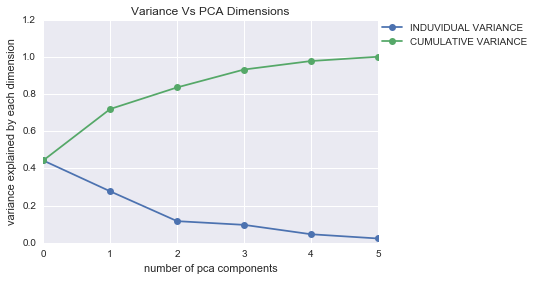

In [44]:
plt.plot(pca.explained_variance_ratio_,marker='o',LABEL="INDUVIDUAL VARIANCE")
plt.xlabel("number of pca components")
plt.ylabel("variance explained by each dimension")
plt.title("Variance Vs PCA Dimensions")
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',LABEL="CUMULATIVE VARIANCE")
plt.legend(bbox_to_anchor=(1.00, 1), loc=2, borderaxespad=0.)

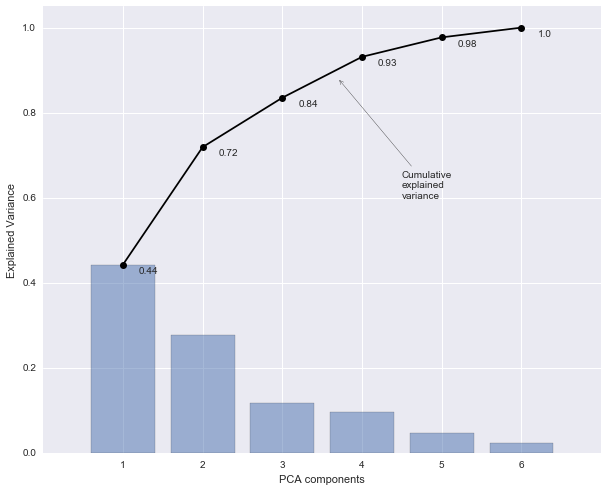

In [49]:
plt.figure(figsize=(10,8))

import matplotlib.pyplot as plt
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative\nexplained\nvariance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(2)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

In [169]:
print(' PCA explained variance percentage- by first and second principal component:\n{}'.format(pca.explained_variance_ratio_[0:2].sum()*100))
print(' PCA explained variance percentage- by first four principal components:\n{}'.format(pca.explained_variance_ratio_[0:4].sum()*100))

 PCA explained variance percentage- by first and second principal component:
71.8945231737073
 PCA explained variance percentage- by first four principal components:
93.12958450547782


### Dimesnion 1
* This dimesnion has clealry seperated the features into two the two segments that is discussed later.
* Segment 1 has fresh and frozen and they decrease together
* Segment 2 has all the others which increase.
* Interpretation- features within a segment show similar behavior.

### Dimesnion 2
* All the features  have a positive effect on PCA-2.
* We also see fresh and frozen have high feature weights. They are bought together.

### Dimesnion 3
* Fresh has the maximum(positive) effect
* Delicatessen has the maximum(negative) effect 

### Dimesnion 4
* Frozen has the maximum(positive) effect.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [170]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4)), columns = pca_results.index.values)

,0,1,2,3,4,5
0,2.3702,1.7971,-0.1871,0.3020,0.5955,-0.0546
1,3.0182,0.3952,-0.1711,1.5640,-0.1637,0.0694
2,1.2799,1.0300,0.4507,-0.9235,0.2267,-0.2611


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [51]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

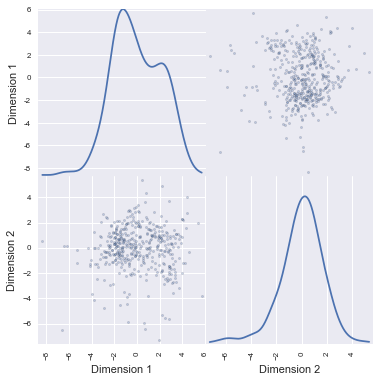

In [52]:
pd.scatter_matrix(reduced_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde');

### For another look at the pca-reduced data, we can also use a joint grid and see 2 humps in the Dimension 1 distribution and "peaks" in the kernel density plot:



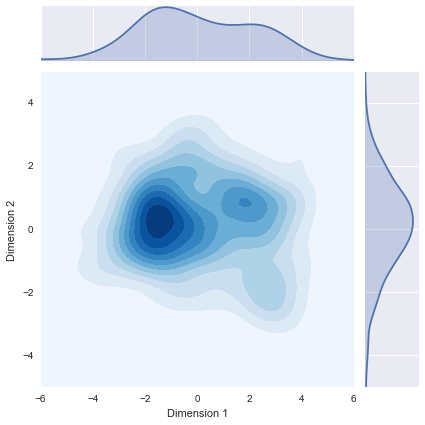

In [58]:
plt.figure(figsize=(14,12))
import seaborn as sns
g = sns.JointGrid("Dimension 1", "Dimension 2", reduced_data, xlim=(-6,6), ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

### The twin peaks in the first dimension represent the two segments.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [173]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4),columns = ['Dimension 1', 'Dimension 2']).head())

,Dimension 1,Dimension 2
0,2.3702,1.7971
1,3.0182,0.3952
2,1.2799,1.0300


### Yes. Values remain unchanged.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
### K means clustering
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing within-cluster sum-of-squares. It scales well to large number of samples and has been used across a large range of application. It is very easy to understand and interpret.


### GMM
Extension of K means model where clusters are modelled with gaussian distributions. Each distribution has a diffeent mean and variance. Models fit by maximizing likelihood of data falling into a cluster through EM algorithm. Works well for overlapping groups,example two groups could be centered at the same place. When clusters are defined by non-circular shape.( K means  will not work here) 


### I would go with K-means as it is the easy to understand and implement model.  

Reference:
http://scikit-learn.org/stable/modules/clustering.html    
https://www.youtube.com/watch?v=qMTuMa86NzU

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

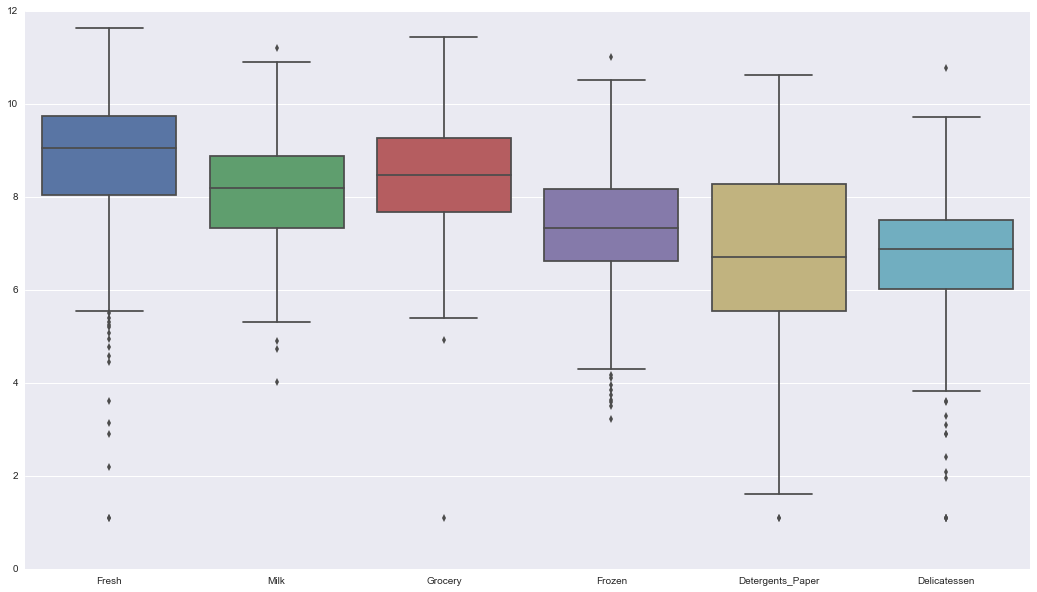

In [36]:
plt.figure(figsize=(18,10))
import seaborn as sns
ax = sns.boxplot(data=log_data)

In [174]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2,random_state=1)

# TODO: Predict the cluster for each data point
#clusterer.fit(reduced_data)
preds =clusterer.fit_predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print(" The Score is {}".format(score))

 The Score is 0.4191660832029231


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 


**Answer:**

** Determining Silhouette Score for 1-20 clusters **

In [175]:
silhouette=[]
for n in range(2,20):
    clusterer = KMeans(n_clusters=n, random_state=10)
    clusterer = clusterer.fit_predict(reduced_data)
    silhouette.append(silhouette_score(reduced_data, clusterer))

### Silhouette Score for 2-20 clusters

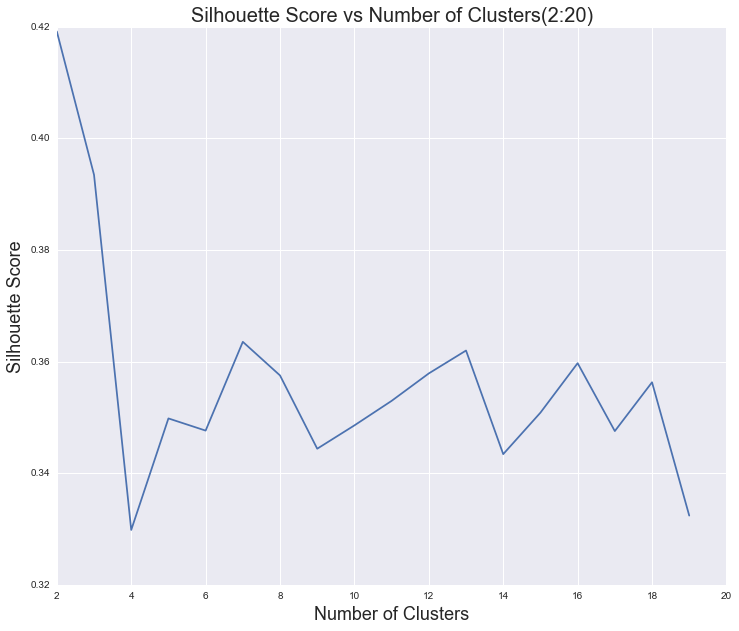

In [176]:
plt.figure(figsize=(12,10))
plt.plot(list(range(2,20)),silhouette)
plt.ylabel('Silhouette Score', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=18)
plt.title('Silhouette Score vs Number of Clusters(2:20)', fontsize=20)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

### Optimum Number of Clusters=2 based on Silhouette Score.

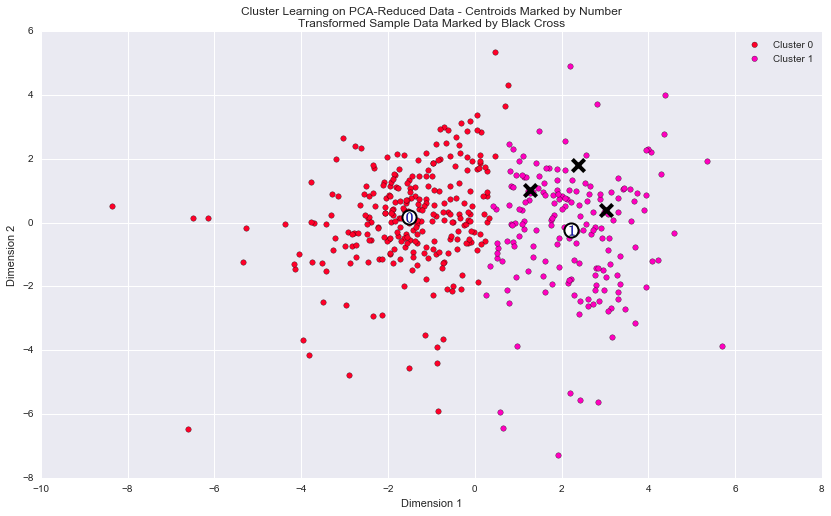

In [177]:
# Display the results of the clustering from implementation
clusterer = KMeans(n_clusters=2, random_state=10)
preds =clusterer.fit_predict(reduced_data)
centers=clusterer.cluster_centers_
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Visualizing  clusters of other sizes

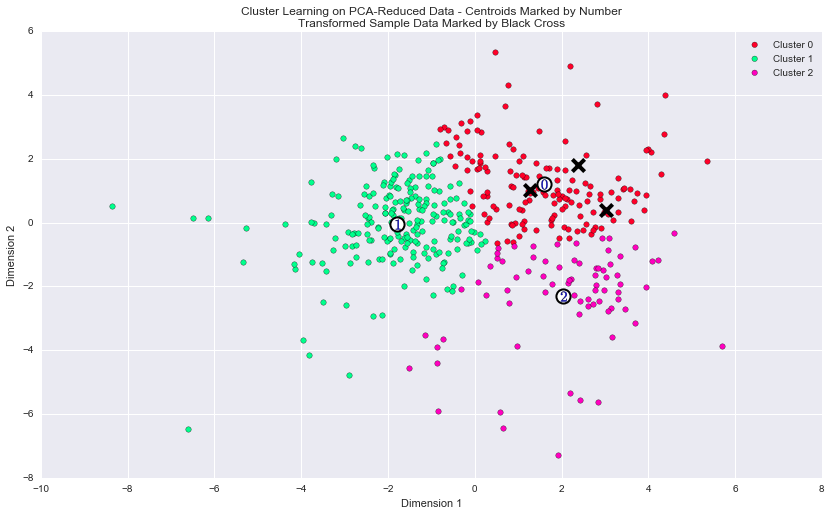

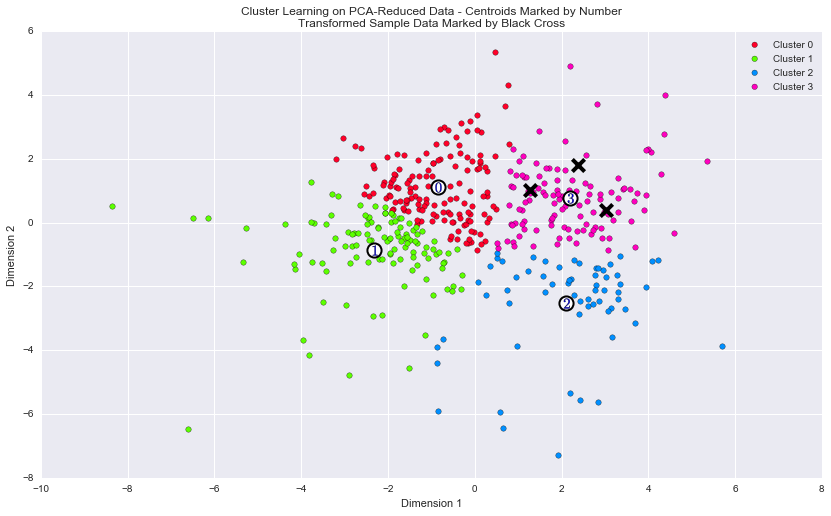

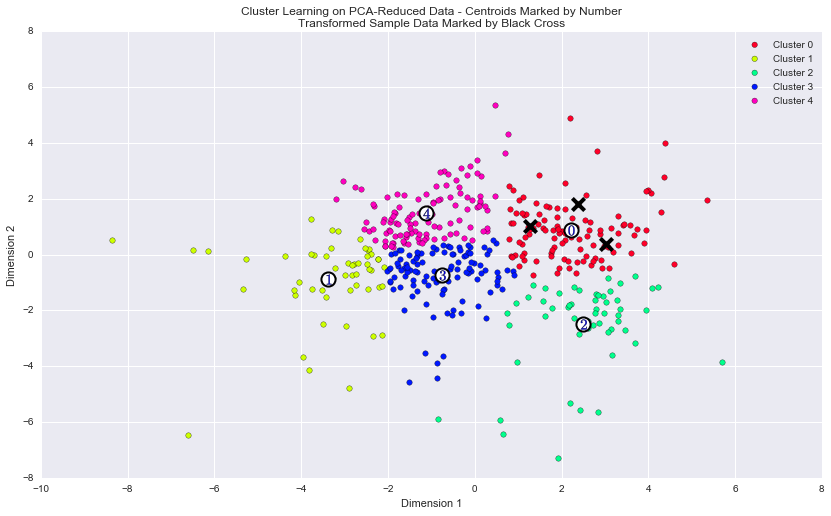

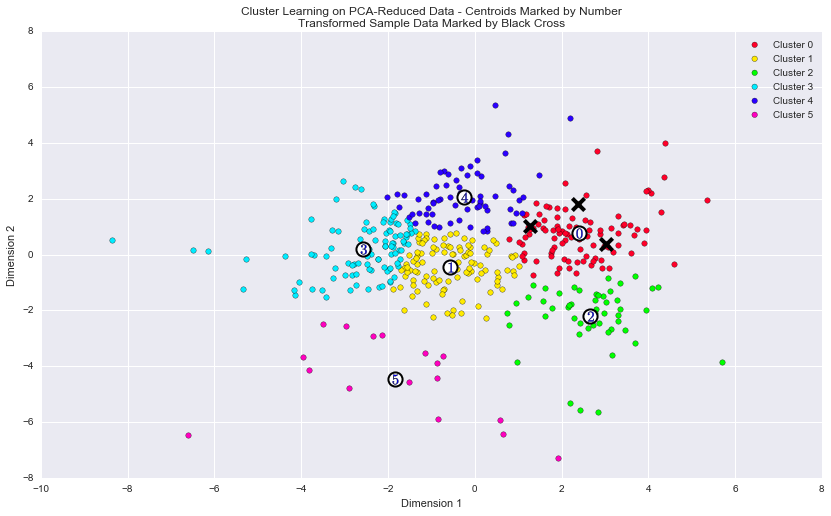

In [178]:
for n in range(3,7):
    clusterer = KMeans(n_clusters=n, random_state=10)
    preds =clusterer.fit_predict(reduced_data)
    centers=clusterer.cluster_centers_
    rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [179]:
clusterer = KMeans(n_clusters=2, random_state=10)
preds =clusterer.fit_predict(reduced_data)
centers=clusterer.cluster_centers_
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(clusterer.cluster_centers_)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8994.0,1909.0,2366.0,2081.0,290.0,681.0
Segment 1,3570.0,7749.0,12463.0,900.0,4567.0,966.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

### Adding the segment centers to the original data and finding their Z score 


In [180]:
# creating one dataframe from data and centers
datas=[log_data,np.log(true_centers)]
datas=pd.concat(datas)
type(datas)

pandas.core.frame.DataFrame

In [181]:
# Finding Z values
data_z=pd.DataFrame()
cols=datas.columns
for col in cols:
    col_zscore = col + '_zscore'
    data_z[col_zscore] = (datas[col] - datas[col].mean())/datas[col].std(ddof=0)

In [182]:
# Extracting Zvalues of segment cenetrs
index=['Segment 0','Segment 1']
data_z=data_z.ix[index,:]
data_z

,Fresh_zscore,Milk_zscore,Grocery_zscore,Frozen_zscore,Detergents_Paper_zscore,Delicatessen_zscore
Segment 0,0.253608,-0.525900,-0.604158,0.265186,-0.650426,-0.108480
Segment 1,-0.372666,0.772804,0.887597,-0.389412,0.954411,0.159121


### Z-score heatmap of segment centers

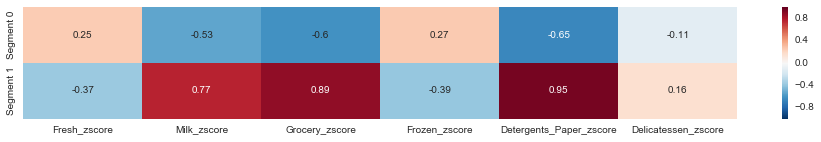

In [183]:
# Heatmap of segment ceneters
plt.figure(figsize=(16, 2))
sns.heatmap(data_z,annot=True,vmin=-1,vmax=0.5)

### Segment 0 and 1 are compared with each other using the Z-score heatmap.

###  Segment 0:
* From the Heatmap-Fresh and Frozen  have positive values.
* Concentrates heavily on perishable food items. This agrees with the 'Hotel/ Restaurant' category as specified in the description in UCI ML repository.

### Segment 1 :
* Has  very high positive values in Milk, grocery and Detergent paper. This would come in 'Retail'. 
* Fresh and Frozen  have negative values. They are not important in this segment.

* **Segment 0 Features: **=Fresh and Frozen
* **Segment 1 Features **=Milk, grocery and Detergent paper
* ** Both or Neither **= Delicatessen

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

**Answer:**  

 * We can speculate the segments of the three sample points by comparing the  Z-scores of the sample points with the Z-scores of segment cenetrs.  We guess that the sample point will fall into the segment  having the closer Z- score.

### Z-scores of samples from log transfomed data

In [184]:
# Finding Z values
data_z2=pd.DataFrame()
cols=log_data.columns
for col in cols:
    col_zscore = col + '_zscore'
    data_z2[col_zscore] = (log_data[col] - log_data[col].mean())/log_data[col].std(ddof=0)
    
data_z2=data_z2.ix[indices,:]

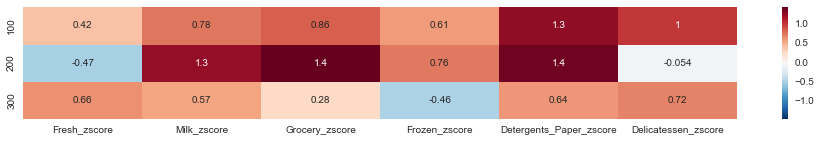

In [185]:
plt.figure(figsize=(16, 2))
sns.heatmap(data_z2,annot=True)

### Z-scores of segment centers

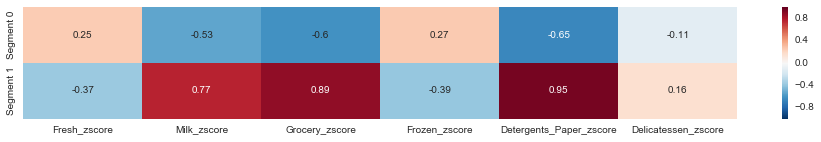

In [186]:
plt.figure(figsize=(16, 2))
sns.heatmap(data_z,annot=True,vmin=-1,vmax=0.5)

###  Earlier predictions made:
* Row 100=Supermarket. There is a good mix of everything in this row.
* Row 200=Grocery store. Very high grocery values
* Row 300=Hotel. Fresh is really high.

###  Current predictions made:  ( by comparing z_scores of segments and samples)
* Row 100- Clearly in segment 0. (segment 0 features are positive and segment 1 features are negative)
* Row 200- Tending towards segment 1. All segemrnt 1 features have big positive values but frozen is also highly positive. This point could go either way.
* Row 300- This looks more like segment 0. Though segment 1 features are positive they are really far from the segement 1 centers which are very high positive values.

In [187]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


* All the points are predicted to be in segment 0.
* Segment 0 is  'Hotel/ Restaurant' for all the three cases.
* Predictions are somewhat consistent.

### Alternatively we could have looked at the percentiles of centers of segments and the sample points to pick the segments of the sample points

           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   52.5  30.8     28.1    58.6              28.2          37.6
Segment 1   28.1  78.3     81.0    32.4              79.2          50.2


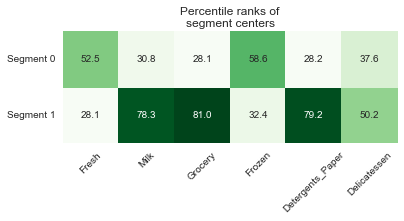

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
# add the true centers as rows to our original data
newdata = data.append(true_centers)

# show the percentiles of the centers
ctr_pcts = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
print (ctr_pcts)

# visualize percentiles with heatmap
_ = sns.heatmap(ctr_pcts, annot=True, cmap='Greens', fmt='.1f', square=True, cbar=False)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0)
plt.title('Percentile ranks of\nsegment centers');

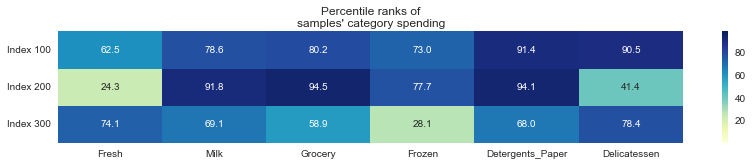

In [189]:
# look at percentile ranks
pcts = 100. * log_data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
# visualize percentiles with heatmap
plt.figure(figsize=(14, 2))
sns.heatmap(pcts, yticklabels=['Index '+str(x) for x in indices], annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B Test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Two distinct groups were identified.  In order to identify the effect of the change we can  try implementing the change (3 day delivery) to a small population of both the groups. We can compare the results obtained with rest of the same group. This impementation could be succesful in one group and fail in another. In that case we may implement the change in the successul group.

### Question 11
Additional structure is derived from originally unlabelled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
The additional input feature would be the cluster number for each customer. I would use a logistic regresion to make the prediction for the 10 customers (since there are only two groups).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

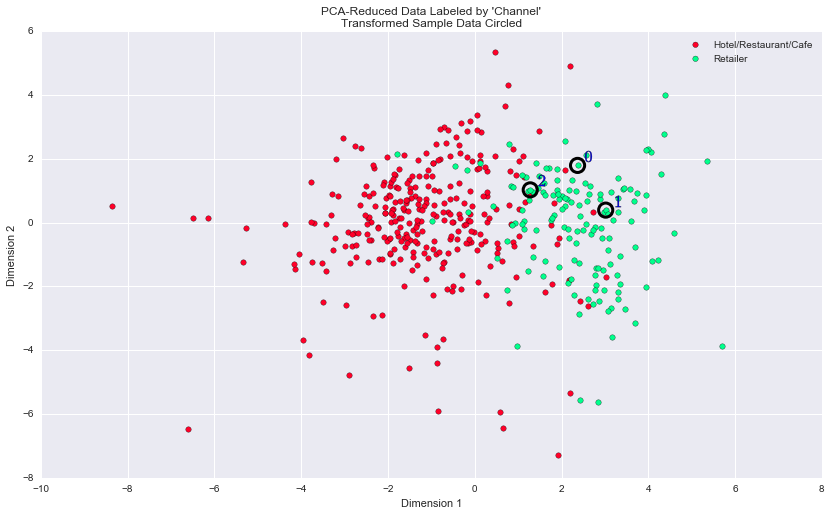

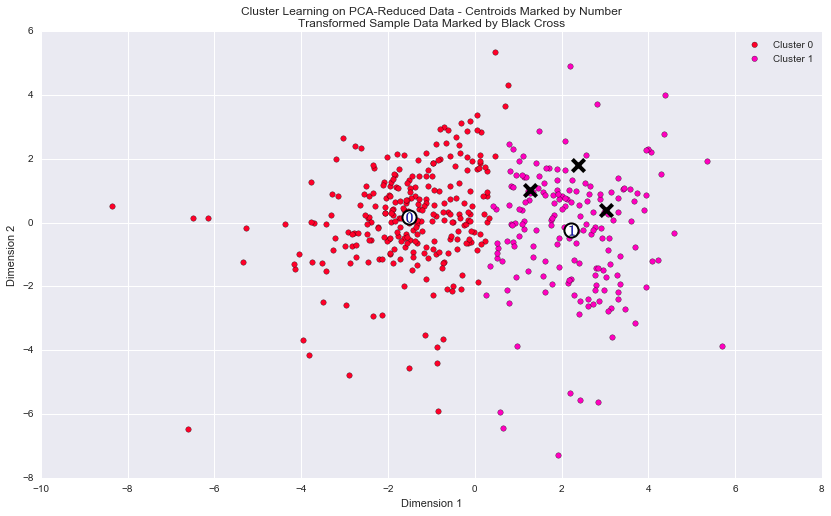

In [190]:
import renders as rs
outliers=[]
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
## Visually comparing the Kmeans cluster and the Original cluster.
### Observations
* Both the clustering look visually similar at first glance
* There is a clear mixing of data points in the original, meaning there is no clear demarcation between the two clusters (Hotel/Restaurant/Cafe).
* In the K-means output there is a clear seperation between the two clusters.
*  K-means does a good job though it creates two very distinct clusters when it is clearly not the case.
* Maybe GMM would have done a better job of classification at the central region.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### EXTRA

* Download original file to obtain classification accuracy by comparing preditced segments and actual segments.

In [191]:
original=pd.read_csv("original.csv")

In [192]:
preds=clusterer.fit_predict(pca_samples)
preds =clusterer.predict(reduced_data)
original.Channel[original.Channel==1]=1
original.Channel[original.Channel==2]=0

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(original.Channel,preds )*100

82.045454545454547

### Classification accuracy of K_means clustering algorithm is 82.04% which is pretty good.

### Check the segment for the three sample points.

In [194]:
print(" The Actual Segment from the original dataset is :")
original.Channel[indices]

 The Actual Segment from the original dataset is :


100    0
200    0
300    0
Name: Channel, dtype: int64

### All the three Sample Points were correctly predicted!!